In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# ### sort_csv_by_time ###
# Sorts a CSV file by the 'time-of-text' column, removes the 'blank' column if present, and saves the sorted data to a new file.

In [2]:
def sort_csv_by_time(input_csv, output_csv):
    try:
        df = pd.read_csv(input_csv)
        
        if 'blank' in df.columns:
            df = df.drop(columns=['blank'])
        
        df['time-of-text'] = pd.to_datetime(df['time-of-text'], format='%H:%M').dt.time
        
        df_sorted = df.sort_values(by='time-of-text')
        
        df_sorted.to_csv(output_csv, index=False)
        print(f"CSV sorted by 'time-of-text' and saved to {output_csv}")
    
    except Exception as e:
        print(f"An error occurred: {e}")

# ### combine_datasets ###
# Combines two datasets, removes duplicates, ensures consistent column names, and saves the result to a new file.


In [3]:
def combine_datasets(dataset1_path, dataset2_path, output_path):
    try:
        dataset1 = pd.read_csv(dataset1_path)
        
        dataset2 = pd.read_csv(
            dataset2_path, 
            delimiter='|', 
            on_bad_lines="skip"
        )
        
        dataset2.columns = dataset1.columns
        
        combined = pd.concat([dataset1, dataset2], ignore_index=True)
        
        combined = combined.drop_duplicates()
        
        combined.to_csv(output_path, index=False)
        print(f"Combined dataset saved to {output_path}")
    
    except Exception as e:
        print(f"An error occurred: {e}")

# ### visualize_time_distribution ###
# Creates visualizations of time mentions in the dataset, including a bar chart for exact times and a histogram grouped by hour.


In [4]:
def visualize_time_distribution(input_csv):
    try:
        df = pd.read_csv(input_csv)

        def parse_time_safe(time_str):
            try:
                return pd.to_datetime(time_str, format='%H:%M').time()
            except ValueError:
                return None

        df['time-of-text'] = df['time-of-text'].apply(parse_time_safe)

        df = df.dropna(subset=['time-of-text'])

        time_counts = df['time-of-text'].value_counts().sort_index()

        plt.figure(figsize=(12, 6))
        plt.bar(time_counts.index.astype(str), time_counts.values, width=0.5, alpha=0.7)

        tick_indices = range(0, len(time_counts), max(1, len(time_counts) // 20))
        tick_labels = [str(time_counts.index[i]) for i in tick_indices]
        plt.xticks(tick_indices, tick_labels, rotation=90)

        plt.title("Distribution of Time Mentions")
        plt.xlabel("Time (HH:MM)")
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()

        df['hour'] = df['time-of-text'].apply(lambda t: t.hour)
        plt.figure(figsize=(10, 6))
        df['hour'].value_counts().sort_index().plot(kind='bar', alpha=0.7)
        plt.title("Time Mentions Grouped by Hour")
        plt.xlabel("Hour (24-hour format)")
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

CSV sorted by 'time-of-text' and saved to sorted_time_quotes.csv
Combined dataset saved to combined_time_quotes.csv


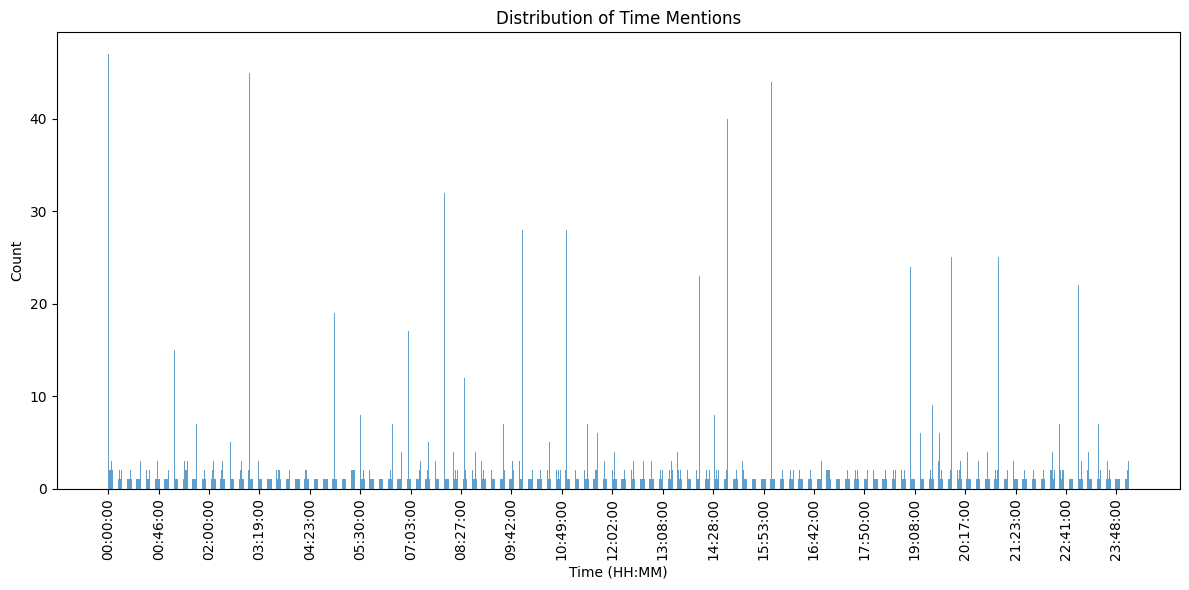

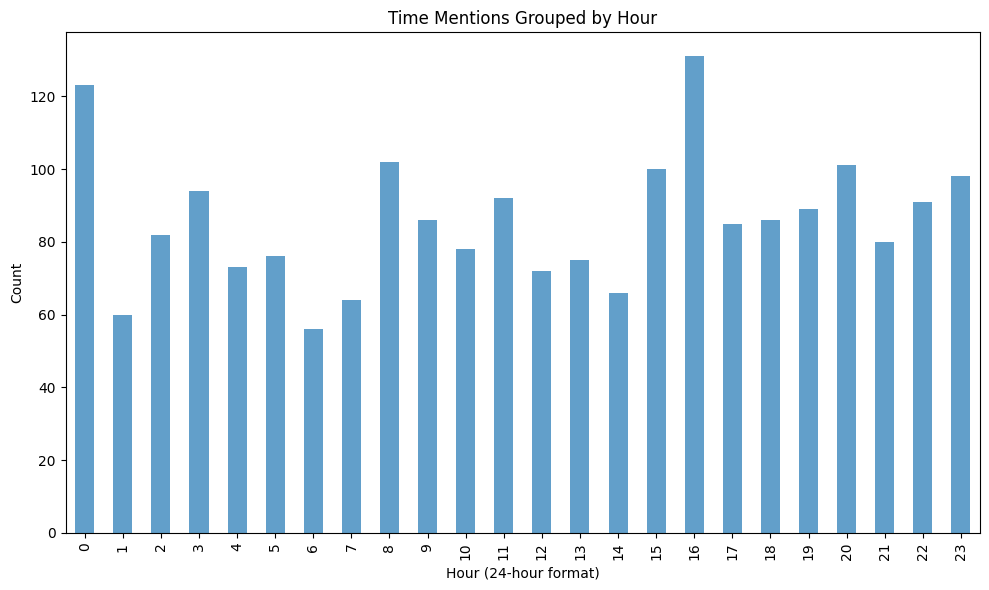

In [5]:
if __name__ == "__main__":
    input_csv = "moretimes.csv"
    sorted_output_csv = "sorted_time_quotes.csv"
    sort_csv_by_time(input_csv, sorted_output_csv)

    dataset1_path = "sorted_time_quotes.csv"
    dataset2_path = "times.csv"
    combined_output_csv = "combined_time_quotes.csv"
    combine_datasets(dataset1_path, dataset2_path, combined_output_csv)

    visualize_time_distribution(combined_output_csv)
